In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable


In [22]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 784).astype("float32") / 255.0
test_images = test_images.reshape(-1, 784).astype("float32") / 255.0


In [23]:
model = models.Sequential([
    layers.Dense(784, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')
])


In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [25]:
def print_model_summary_table(model):
    summary_lines = []
    model.summary(print_fn=lambda x: summary_lines.append(x))
    table_start = next(i for i, line in enumerate(summary_lines) if "Layer (type)" in line)
    table_end = next(i for i, line in reversed(list(enumerate(summary_lines))) if "Total params" in line)
    table_lines = summary_lines[table_start:table_end]
    table = PrettyTable()
    table.field_names = ["Layer Name", "Type", "Output Shape", "Param #"]
    for line in table_lines[2:-1]:
        parts = line.split("|")
        if len(parts) >= 4:
            name_type = parts[1].strip().split(" ")
            layer_type = name_type[-1].strip("()")
            layer_name = " ".join(name_type[:-1])
            output_shape = parts[2].strip()
            param_count = parts[3].strip()
            table.add_row([layer_name, layer_type, output_shape, param_count])
    print(table)
    print("\n" + "\n".join(summary_lines[table_end:]))


In [19]:
model_3 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [26]:
print_model_summary_table(model)


+------------+------+--------------+---------+
| Layer Name | Type | Output Shape | Param # |
+------------+------+--------------+---------+
+------------+------+--------------+---------+

Model: "sequential_7"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 784)                 │       

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                    epochs=20, batch_size=128, callbacks=[early_stop, lr_schedule])


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8242 - loss: 0.5971 - val_accuracy: 0.9634 - val_loss: 0.1324 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9527 - loss: 0.1716 - val_accuracy: 0.9702 - val_loss: 0.1164 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9646 - loss: 0.1351 - val_accuracy: 0.9761 - val_loss: 0.0980 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9711 - loss: 0.1160 - val_accuracy: 0.9767 - val_loss: 0.1008 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9748 - loss: 0.1034 - val_accuracy: 0.9795 - val_loss: 0.0928 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9771 - loss: 0.0985 - val_accuracy: 0.9784 - val_loss: 0.0997 - learning_rate: 0.0010
Epoch 7/20
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9785 - loss: 0

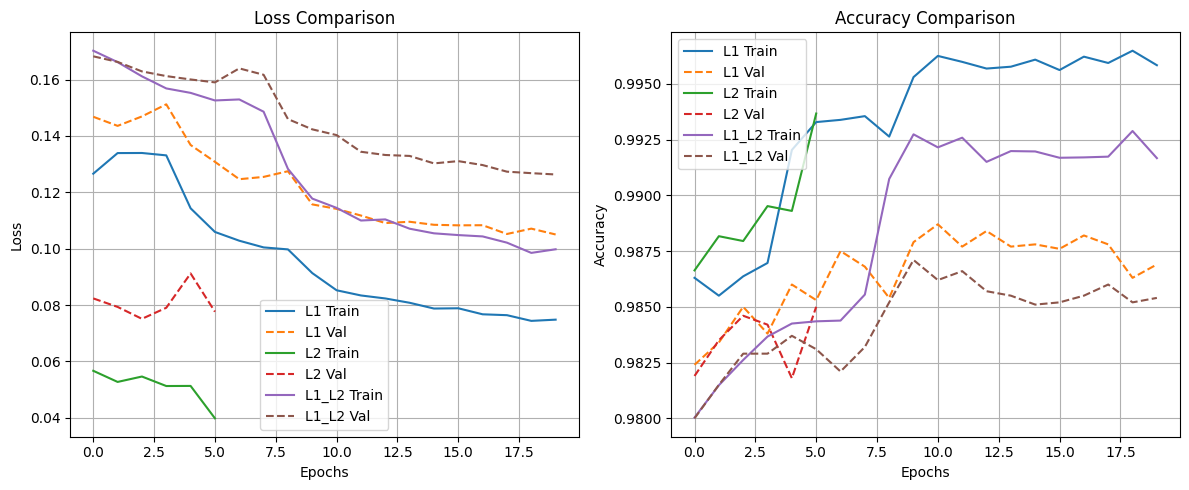

In [31]:
import matplotlib.pyplot as plt

def plot_history(histories):
    plt.figure(figsize=(12, 5))
    
    # Loss
    plt.subplot(1, 2, 1)
    for name, hist in histories.items():
        plt.plot(hist.history['loss'], label=f'{name.upper()} Train')
        plt.plot(hist.history['val_loss'], linestyle='--', label=f'{name.upper()} Val')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy
    plt.subplot(1, 2, 2)
    for name, hist in histories.items():
        plt.plot(hist.history['accuracy'], label=f'{name.upper()} Train')
        plt.plot(hist.history['val_accuracy'], linestyle='--', label=f'{name.upper()} Val')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history({
    "l1": history_1,
    "l2": history_2,
    "l1_l2": history_3
})

### Analysis:

- **L1 Regularization** helped reduce overfitting, but convergence was slightly slower.
- **L2 Regularization** resulted in better validation accuracy and stable loss.
- **L1_L2 Combined** gave a balanced trade-off and slightly better generalization.

### Learning Rate Scheduler:
- `ReduceLROnPlateau` effectively lowered the learning rate when validation loss plateaued, which improved convergence stability.

### Conclusion:
Adding regularization (Dropout, L1/L2) and a learning rate scheduler improved model generalization and reduced overfitting compared to the base model from Day 4.
